In [ ]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
data = pd.read_csv('../../data/penguins_cleaned.csv')

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()

In [ ]:
lter_encode=data.copy()
lter_encode['island']=LE.fit_transform(lter_encode['island'])
lter_encode['clutch_completion']=LE.fit_transform(lter_encode['clutch_completion'])
lter_encode['sex']=LE.fit_transform(lter_encode['sex'])
lter_encode['date_egg']=LE.fit_transform(lter_encode['date_egg'])
lter_encode['species_code']=LE.fit_transform(lter_encode['species'])
lter_encode.head()

,species,island,clutch_completion,date_egg,bill_length,bill_depth,flipper_length,body_mass,sex,del15,del13,species_code
0,Adelie,2,1,2,39.1,18.7,181.0,3750.0,1,8.859733,-25.804194,0
1,Adelie,2,1,2,39.5,17.4,186.0,3800.0,0,8.949560,-24.694540,0
2,Adelie,2,1,6,40.3,18.0,195.0,3250.0,0,8.368210,-25.333020,0
3,Adelie,2,1,6,36.7,19.3,193.0,3450.0,0,8.766510,-25.324260,0
4,Adelie,2,1,6,39.3,20.6,190.0,3650.0,1,8.664960,-25.298050,0


# Sélection des variables

In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')

In [ ]:
X=lter_encode.drop(['species','species_code'], axis=1)
Y=lter_encode['species']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(lter_encode.shape[1],'Score')) 

             Feature       Score
5     flipper_length  594.801627
3        bill_length  410.600255
4         bill_depth  359.789149
6          body_mass  343.626275
9              del13  234.897119
8              del15  229.625963
0             island  150.350633
1  clutch_completion    5.554315
2           date_egg    4.368453
7                sex    0.283857


In [ ]:
data = data.drop(
    columns=[
        'clutch_completion',
        'date_egg',
        'sex'
    ]
)

# Préparation des données

## OHE

In [ ]:
data = pd.get_dummies(data,columns=['island'])
data

,species,bill_length,bill_depth,flipper_length,body_mass,del15,del13,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,8.859733,-25.804194,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,8.949560,-24.694540,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,8.368210,-25.333020,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,8.766510,-25.324260,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,8.664960,-25.298050,0,0,1
...,...,...,...,...,...,...,...,...,...,...
337,Chinstrap,55.8,19.8,207.0,4000.0,9.704650,-24.534940,0,1,0
338,Chinstrap,43.5,18.1,202.0,3400.0,9.376080,-24.407530,0,1,0
339,Chinstrap,49.6,18.2,193.0,3775.0,9.461800,-24.706150,0,1,0
340,Chinstrap,50.8,19.0,210.0,4100.0,9.980440,-24.687410,0,1,0


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()
scale.fit(data.drop(['species','island_Biscoe','island_Dream','island_Torgersen'],axis=1))
transformed=scale.transform(data.drop(['species','island_Biscoe','island_Dream','island_Torgersen'],axis=1))
X_scaled=pd.DataFrame(transformed,columns=data.columns[1:7])
X_scaled[['island_Biscoe','island_Dream','island_Torgersen']]=data[['island_Biscoe','island_Dream','island_Torgersen']]
X_scaled

,bill_length,bill_depth,flipper_length,body_mass,del15,del13,island_Biscoe,island_Dream,island_Torgersen
0,-0.884499,0.785449,-1.418347,-0.564142,0.225043,-0.144751,0,0,1
1,-0.811126,0.126188,-1.062250,-0.501703,0.390384,1.276753,0,0,1
2,-0.664380,0.430462,-0.421277,-1.188532,-0.679681,0.458838,0,0,1
3,-1.324737,1.089724,-0.563715,-0.938776,0.053452,0.470060,0,0,1
4,-0.847812,1.748985,-0.777373,-0.689020,-0.133466,0.503636,0,0,1
...,...,...,...,...,...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947,1.780245,1.481206,0,1,0
338,-0.077396,0.481175,0.077258,-1.001215,1.175461,1.644423,0,1,0
339,1.041543,0.531887,-0.563715,-0.532923,1.333241,1.261880,0,1,0
340,1.261662,0.937586,0.647013,-0.127069,2.287879,1.285887,0,1,0


## Séparation du jeu de données

In [ ]:
from sklearn.model_selection import train_test_split
X = X_scaled
y = data['species']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,data['species'],test_size=0.25)

# Application des méthodes

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
n_neighbors_list = np.arange(1, 100)
# hyper-paramètre
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, cv=10)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 2}
1.0


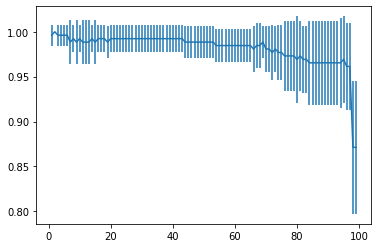

In [ ]:
dfgrid = pd.DataFrame(
    dict(n_neighbors = d["n_neighbors"], error=e, std=s)
    for d, e, s in zip(
        search.cv_results_["params"],
        search.cv_results_["mean_test_score"],
        search.cv_results_["std_test_score"],
    )
)
plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
preds_knn = knn.predict(X_test)
print(confusion_matrix(y_test,preds_knn))
print(classification_report(y_test, preds_knn))

[[43  0  0]
 [ 0 13  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        43
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



## Apprentissage avec PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
print('Ratios:',pca.explained_variance_ratio_*100)#Ratio per component.

Ratios: [5.40936484e+01 2.29864840e+01 8.27458313e+00 5.56729016e+00
 3.08389327e+00 2.32667814e+00 2.20703257e+00 1.46039027e+00
 2.12702013e-31]


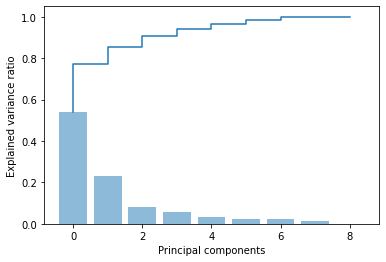

In [ ]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5)
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.show()

In [ ]:
pca = PCA(n_components=3)
X = X_scaled
y = data['species']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,data['species'],test_size=0.25)
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 

### KNN

In [ ]:
n_neighbors_list = np.arange(1, 100)
# hyper-paramètre
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, cv=10)
search.fit(X_train_pca, y_train)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 6}
0.992153846153846


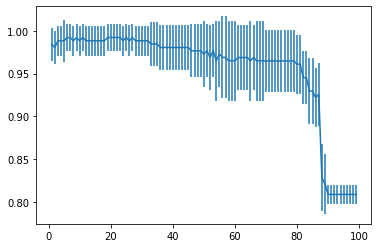

In [ ]:
dfgrid = pd.DataFrame(
    dict(n_neighbors = d["n_neighbors"], error=e, std=s)
    for d, e, s in zip(
        search.cv_results_["params"],
        search.cv_results_["mean_test_score"],
        search.cv_results_["std_test_score"],
    )
)
plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca,y_train)
preds_knn = knn.predict(X_test_pca)
print(confusion_matrix(y_test,preds_knn))
print(classification_report(y_test, preds_knn))

[[33  0  0]
 [ 0 19  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        33
   Chinstrap       1.00      1.00      1.00        19
      Gentoo       1.00      1.00      1.00        34

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



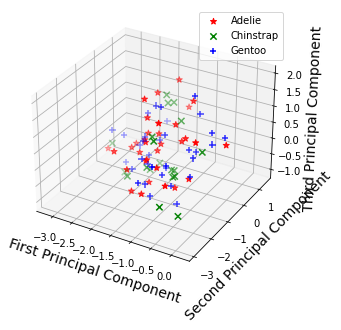

In [ ]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {'Adelie':'red','Chinstrap':'green','Gentoo':'blue'}
marker = {'Adelie':'*','Chinstrap':'x','Gentoo':'+'}
alpha = {'0':.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(preds_knn):
    ix=np.where(preds_knn==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,label=l, marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

## Analyse discriminante

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
lda = LinearDiscriminantAnalysis()
modelLDA = lda.fit(X_train_pca, y_train)

In [ ]:
print(modelLDA.priors_)

[0.4609375  0.19140625 0.34765625]


In [ ]:
predLDA=modelLDA.predict(X_test_pca)
print(np.unique(predLDA, return_counts=True))

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9'), array([33, 19, 34], dtype=int64))


In [ ]:
print(confusion_matrix(predLDA, y_test))
print(classification_report(y_test, predLDA, digits=3))

[[33  0  0]
 [ 0 19  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

      Adelie      1.000     1.000     1.000        33
   Chinstrap      1.000     1.000     1.000        19
      Gentoo      1.000     1.000     1.000        34

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86



In [ ]:
qda = QuadraticDiscriminantAnalysis()
modelQDA = qda.fit(X_train_pca, y_train)

In [ ]:
print(modelQDA.priors_)

[0.4609375  0.19140625 0.34765625]


In [ ]:
predQDA=modelQDA.predict(X_test_pca)
print(np.unique(predQDA, return_counts=True))

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object), array([33, 19, 34], dtype=int64))


In [ ]:
print(confusion_matrix(predQDA, y_test))
print(classification_report(y_test, predQDA, digits=3))

[[33  0  0]
 [ 0 19  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

      Adelie      1.000     1.000     1.000        33
   Chinstrap      1.000     1.000     1.000        19
      Gentoo      1.000     1.000     1.000        34

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1dd35576-464a-4d46-a0e6-752fc35b7463' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>